In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import pickle

# Load the data

In [162]:
sns.set()

data = pd.read_csv('data/Mall_Customers.csv')

print(data)

     CustomerID   Genre  Age  Income  Spending
0             1    Male   19      15        39
1             2    Male   21      15        81
2             3  Female   20      16         6
3             4  Female   23      16        77
4             5  Female   31      17        40
..          ...     ...  ...     ...       ...
195         196  Female   35     120        79
196         197  Female   45     126        28
197         198    Male   32     126        74
198         199    Male   32     137        18
199         200    Male   30     137        83

[200 rows x 5 columns]


# Extract the rows using Pandas iloc[]

In [163]:
x = data.iloc[:, 3:5]

x

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Specify the n clusters we want and fitting the ML model using fit() method

In [164]:
n_cluster = 5

kmeans = KMeans(n_cluster)
kmeans.fit(x)

with open('output/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

/home/rfnp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# fit_predict() method will fit and perform predictions over the training data

In [165]:
identified_clusters = kmeans.fit_predict(x)

print(identified_clusters)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


/home/rfnp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Copy data (which has no cluster) to data_with_clusters

In [166]:
data_with_clusters = data.copy()

data_with_clusters

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# After copying the data, then specify which customer belong to which cluster

In [167]:
data_with_clusters['Clusters'] = identified_clusters

data_with_clusters

,CustomerID,Genre,Age,Income,Spending,Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


# Create scatter plot using data_with_clusters

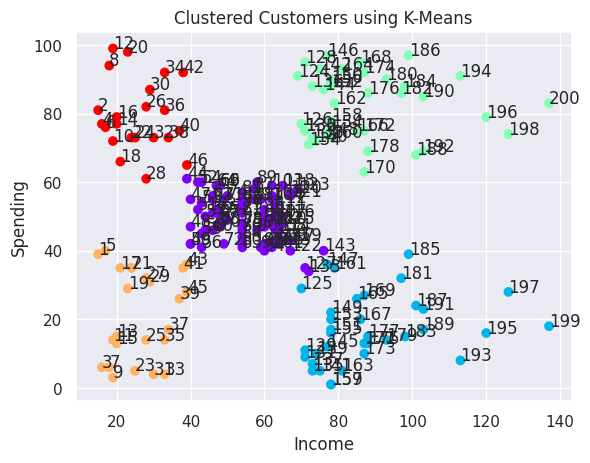

In [168]:
plt.scatter(data_with_clusters['Income'], data_with_clusters['Spending'], c = data_with_clusters['Clusters'], cmap='rainbow')

plt.title('Clustered Customers using K-Means')
plt.xlabel('Income')
plt.ylabel('Spending')

for i, txt in enumerate(data_with_clusters['CustomerID']):
    plt.annotate(txt, (x.loc[i, 'Income'], x.loc[i, 'Spending']))

plt.savefig('output/kmeans_clustering_output.jpg')
plt.show()